<a href="https://colab.research.google.com/github/jeevanshrestha/Machine-Learning/blob/main/Stochastic_Gradient_Descent_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [6]:
X,y = load_diabetes(return_X_y=True)

In [7]:
X.shape

(442, 10)

In [8]:
y.shape

(442,)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [12]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [13]:
reg.intercept_

151.88331005254167

In [14]:
y_pred = reg.predict(X_test)

In [15]:
r2_score(y_test, y_pred)

0.4399338661568968

In [121]:
import numpy as np
import matplotlib.pyplot as plt

class MY_SGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def fit(self, X, y):
        y = y.reshape(-1)  # Ensure y is 1D
        n_samples, n_features = X.shape

        # Initialize coefficients and intercept
        self.coef_ = np.ones(n_features)
        self.intercept_ = 0

        for epoch in range(self.epochs):
            total_loss = 0

            for j in range(n_samples):
                # Random index selection

                lr = self.learning_rate( epoch * n_samples + j)*0.1
                index = np.random.randint(0, n_samples)
                x_sample = X[index]
                y_sample = y[index]

                # Predict the output for this sample
                y_pred = np.dot(x_sample, self.coef_) + self.intercept_

                # Compute gradients
                dw = -2 * (y_sample - y_pred) * x_sample  # Gradient w.r.t weights
                db = -2 * (y_sample - y_pred)            # Gradient w.r.t bias

                # Update weights and bias
                self.coef_ -=  lr * dw
                self.intercept_ -=  lr * db

                # Accumulate the loss for this sample
                total_loss += (y_sample - y_pred) ** 2

            # Average loss for the epoch
            epoch_loss = total_loss / n_samples
            self.loss_history.append(epoch_loss)

            if epoch % 10 == 0:  # Print every 10 epochs
                print(f"Epoch {epoch }/{self.epochs}, Loss: {epoch_loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def get_params(self):
        return self.coef_, self.intercept_

    def get_loss_history(self):
        return self.loss_history

    def learning_rate(self, t):
      t0,t1 = 5, 50
      return (t0/(t+t1))

    def plot_loss(self):
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss during Training')
        plt.show()


In [124]:
sgd = MY_SGDRegressor(learning_rate=0.01, epochs = 1000)

In [125]:
sgd.fit(X_train, y_train)

Epoch 0/1000, Loss: 8242.3619
Epoch 10/1000, Loss: 6012.2189
Epoch 20/1000, Loss: 5996.9396
Epoch 30/1000, Loss: 5980.6932
Epoch 40/1000, Loss: 6479.1436
Epoch 50/1000, Loss: 5953.4664
Epoch 60/1000, Loss: 5488.6509
Epoch 70/1000, Loss: 5876.1650
Epoch 80/1000, Loss: 5512.5203
Epoch 90/1000, Loss: 5885.0178
Epoch 100/1000, Loss: 5445.3481
Epoch 110/1000, Loss: 5925.7220
Epoch 120/1000, Loss: 5725.7527
Epoch 130/1000, Loss: 5312.3435
Epoch 140/1000, Loss: 5864.3723
Epoch 150/1000, Loss: 5695.9882
Epoch 160/1000, Loss: 6164.6219
Epoch 170/1000, Loss: 5613.3679
Epoch 180/1000, Loss: 6258.1629
Epoch 190/1000, Loss: 5595.1177
Epoch 200/1000, Loss: 6348.8367
Epoch 210/1000, Loss: 4964.8338
Epoch 220/1000, Loss: 5517.3324
Epoch 230/1000, Loss: 5559.4812
Epoch 240/1000, Loss: 5853.5133
Epoch 250/1000, Loss: 5673.5953
Epoch 260/1000, Loss: 5678.9715
Epoch 270/1000, Loss: 5794.5207
Epoch 280/1000, Loss: 5873.9327
Epoch 290/1000, Loss: 6094.6901
Epoch 300/1000, Loss: 5421.3635
Epoch 310/1000, Los

In [126]:
# Predict new values
predictions = sgd.predict(X_test)
print("Predictions:", predictions)

# Output the learned weights and bias
coefs, intercept = sgd.get_params()
print("Coefs:", coefs)
print("Intercept:", intercept)

Predictions: [151.3715786  154.13714958 150.68239353 147.53269898 157.21356616
 156.4643964  146.51306138 147.33934077 145.62017641 153.49584409
 153.03437571 152.32700649 153.81728542 152.00600793 156.72480945
 146.69164576 152.56022788 148.75652044 150.44032532 150.27501569
 147.72792404 156.00240472 153.35069781 153.66622292 148.70134021
 156.17582268 154.00632295 150.05036465 143.97329698 159.07912725
 157.56705392 148.51324632 144.77666335 148.57742711 154.61980653
 152.17902349 152.70252262 155.04911807 147.93989106 157.16212871
 148.97530961 149.25030633 153.78430385 153.72839817 151.95524906
 150.53771141 152.89938548 159.88804267 148.75769995 155.87555324
 156.65084986 147.79826043 149.29234721 152.4612093  154.00771462
 148.87962594 153.35292556 146.01551529 151.33239603 149.08742889
 151.99655205 153.41316119 148.16634005 153.76494688 151.85394939
 153.12523242 149.68937141 153.45241087 147.72275499 151.45685105
 153.9950219  152.72103319 147.88928371 150.26677194 149.470303

In [127]:
r2_score(y_test, predictions)

0.045146433553635124

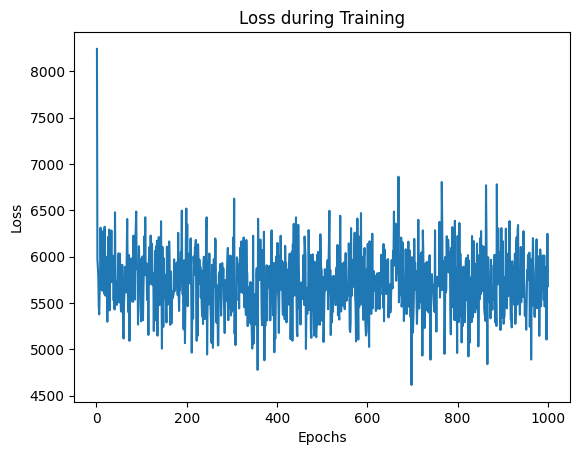

In [128]:
sgd.plot_loss()

In [130]:
from sklearn.linear_model import SGDRegressor


In [136]:
sgdr = SGDRegressor(learning_rate='adaptive')

In [137]:
sgdr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='adaptive')

In [138]:
y_pred = sgdr.predict(X_test)

In [139]:
r2_score(y_test, y_pred)

0.451256252035091